# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Daffon, David D. \
_Student No._: 2021-04594 \
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** 

I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work. 


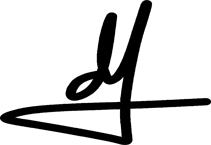

In [1]:
from IPython.display import Image #run cell to display e-sig
Image(filename="sig.png")

**DAVID D. DAFFON**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

**I skip this step since I load the .npy file locally**

In [2]:
import os # these are preliminaries from Sir Sean for loading the data set locally (same folder situation)
import sys

cur_path = os.path.abspath(os.path.join(''))
if cur_path not in sys.path:
    sys.path.append(cur_path)

Run this command to list the directories in your Google Drive and check that the mount was successful.

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [3]:
import numpy as np

data = np.load('galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [4]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape)
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [5]:
# preliminaries: importing the libraries I need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame(data) # creating a DataFrame 'df' which contains the data from 'galaxy_catalogue.npy'
display(df)  # displaying df to understand the data

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.34594,0.64285,0.37813,0.23107,0.779956,2.421518,2.248886,2.589488,2.615007,2.601444,13.877220,11.936910,11.337210,32.374710,25.266770,25.934250,spiral
776,1.19482,0.49611,0.31017,0.16244,0.722125,2.211442,2.294102,2.327795,2.371559,2.358487,3.032364,3.348147,3.062732,5.833694,8.061935,7.840197,spiral
777,1.21489,0.57253,0.35423,0.21312,0.793392,2.264709,2.319192,2.388157,2.392148,2.384103,4.652165,4.031008,3.122812,9.610085,9.280005,6.708179,spiral
778,1.41797,0.86460,0.40020,0.35307,0.835901,2.011354,2.023669,2.326873,2.676343,2.560389,5.442954,4.227347,3.774427,16.256520,7.738220,7.865478,spiral


In [7]:
def get_features_targets(input): # defining the function as described, taking in 'input' 
    
    df = pd.DataFrame(input) # input is cast into a DataFrame

    df1 = df.iloc[:,:16] # from inspection of 'data', I know I need to separate the first 16 columns from the last column (this is 'features')
    df2 = df.iloc[:,16:] # this is 'targets'

    df1.loc[:, "R50/R90_u"] = df1['petroR50_u']/df1['petroR90_u'] # dividing column 'petroR50_u' by 'petroR90_u' and adding it as column 'R50/R90_u 
    df1.loc[:, "R50/R90_r"] = df1['petroR50_r']/df1['petroR90_r'] # same as line above
    df1.loc[:, "R50/R90_z"] = df1['petroR50_z']/df1['petroR90_z'] # same as line above

    df1 = df1.drop(columns=['petroR50_u', 'petroR50_r', 'petroR50_z', 'petroR90_u', 'petroR90_r', 'petroR90_z'], axis=1) # dropping the unneeded columns

    features, targets = df1, df2 # defining features and targets as required
    
    return features, targets


In [8]:
f, t = get_features_targets(data) # implementing the function on the data

In [9]:
display(f, t) # inspecting the results

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,R50/R90_u,R50/R90_r,R50/R90_z
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,0.598113,0.462170,0.333373
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,0.383216,0.416320,0.416091
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,0.340249,0.433751,0.307428
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,0.378602,0.333005,0.314361
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,0.353735,0.322113,0.339692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.34594,0.64285,0.37813,0.23107,0.779956,2.421518,2.248886,2.589488,2.615007,2.601444,0.428644,0.472435,0.437152
776,1.19482,0.49611,0.31017,0.16244,0.722125,2.211442,2.294102,2.327795,2.371559,2.358487,0.519802,0.415303,0.390645
777,1.21489,0.57253,0.35423,0.21312,0.793392,2.264709,2.319192,2.388157,2.392148,2.384103,0.484092,0.434376,0.465523
778,1.41797,0.86460,0.40020,0.35307,0.835901,2.011354,2.023669,2.326873,2.676343,2.560389,0.334817,0.546294,0.479873


,class
0,merger
1,merger
2,merger
3,merger
4,merger
...,...
775,spiral
776,spiral
777,spiral
778,spiral


### Author's note

In this part, we prepare the data for classification. I load the data set and convert it into DataFrame to display for inspection. 

After inspection, I define the function as such: I determine which columns to separate to create the desired 'features' and 'targets' separation. In the DataFrame created, the first 16 columns fall under 'features' and the 17th column falls into 'targets'. I separate these as needed using pd.iloc and assign them into new separate DataFrames.

Then, using DataFrame comprehension, I perform the required column operations and use pd.loc to assign them as new columns in the 'features' DataFrame. I then drop the unneeded columns in the 'features' DataFrame. 

To finish, I declare features and targets as outputs of the function.

I note that I try to make full use of the modular nature of Jupyter notebooks and separate my code into many code cells when doing pandas so that inspection of every step is easy.

#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [10]:
# preliminaries
from sklearn import model_selection, metrics, tree

In [11]:
def predict_class(input): # defining the function as described, taking in an 'input'

    d_train, d_test = model_selection.train_test_split(input, train_size=0.8, test_size=0.2, random_state=100) # we split the data into training and testing subsets
    df_train = pd.DataFrame(d_train) # turning substes into DataFrames
    df_test = pd.DataFrame(d_test)

    f_train, t_train = get_features_targets(df_train) # calling the get_features_targets functions on the training and testing DataFrames
    f_test, t_test = get_features_targets(df_test)

    cls = tree.DecisionTreeClassifier() # creating DecisionTreeClassifier object

    cls = cls.fit(f_train, t_train) # implementing fit on training DataFrame

    t_pred = cls.predict(f_test) # creating predictions

    predicted_class, actual_class = t_pred, t_test # defining predicted_class and actual_class as required

    return predicted_class, actual_class


In [12]:
predicted_class, actual_class = predict_class(data) # implementing the function on data

### Author's note

We follow a similar process to part 1. I define the function as such: I use train_test_split to split the 'input' into the training and testing subsets of the required size. I then cast these subsets into DataFrames so that 

#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

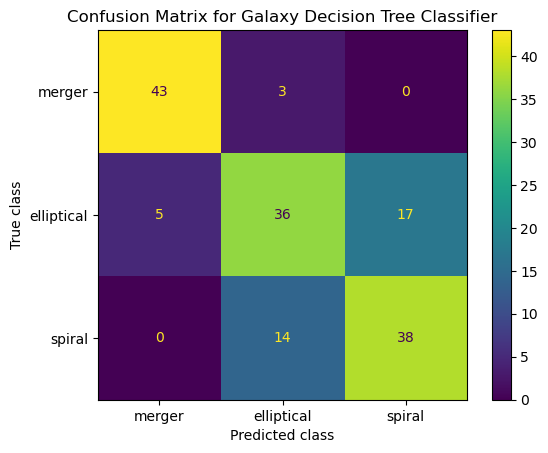

In [13]:
c_mat = metrics.confusion_matrix(actual_class, predicted_class) # creating confusion matrix
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = c_mat, display_labels = ['merger', 'elliptical', 'spiral']) # using ConfusionMatrixDisplay to prepare for plotting cmap

cm_disp.plot() # plotting cmap
plt.title('Confusion Matrix for Galaxy Decision Tree Classifier')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [23]:
accuracy = metrics.accuracy_score(predicted_class, actual_class) # calculating the accuracy of the prediction to actual
print("The decision tree classifier's accuracy is", accuracy) # printing

The decision tree classifier's accuracy is 0.7371794871794872


### Further exploration

In [15]:
def predict_class2(input): # defining the function as described, taking in an 'input'

    d_train2, d_test2 = model_selection.train_test_split(input, train_size=0.5, test_size=0.5, random_state=100) # we split the data into training and testing subsets
    df_train2 = pd.DataFrame(d_train2) # turning substes into DataFrames
    df_test2 = pd.DataFrame(d_test2)

    f_train2, t_train2 = get_features_targets(df_train2) # calling the get_features_targets functions on the training and testing DataFrames
    f_test2, t_test2 = get_features_targets(df_test2)

    cls2 = tree.DecisionTreeClassifier() # creating DecisionTreeClassifier object

    cls2 = cls2.fit(f_train2, t_train2) # implementing fit on training DataFrame

    t_pred2 = cls2.predict(f_test2) # creating predictions

    predicted_class2, actual_class2 = t_pred2, t_test2 # defining predicted_class and actual_class as required

    return predicted_class2, actual_class2


In [16]:
predicted_class2, actual_class2 = predict_class2(data) # implementing the function on data

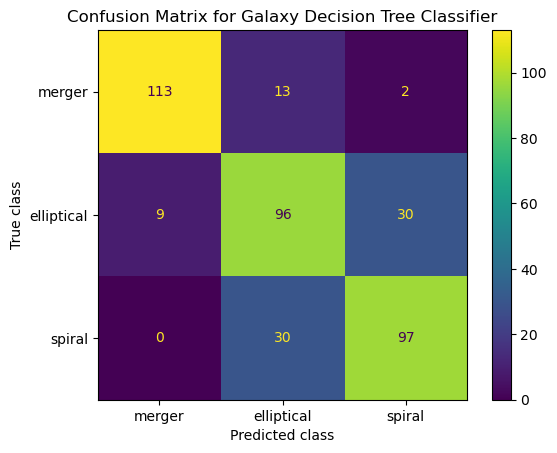

In [17]:
c_mat = metrics.confusion_matrix(actual_class2, predicted_class2) # creating confusion matrix
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = c_mat, display_labels = ['merger', 'elliptical', 'spiral']) # using ConfusionMatrixDisplay to prepare for plotting cmap

cm_disp.plot() # plotting cmap
plt.title('Confusion Matrix for Galaxy Decision Tree Classifier')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [25]:
accuracy2 = metrics.accuracy_score(predicted_class2, actual_class2) # calculating the accuracy of the prediction to actual
print("The decision tree classifier's accuracy is", accuracy2) # printing

The decision tree classifier's accuracy is 0.7846153846153846


### We compare the two classifiers

In [27]:
a_list = []
a2_list = []

for i in range(100):
    predicted_class, actual_class = predict_class(data)
    predicted_class2, actual_class2 = predict_class2(data)

    a_list.append(metrics.accuracy_score(predicted_class, actual_class))
    a2_list.append(metrics.accuracy_score(predicted_class2, actual_class2))

    

In [26]:
a = np.mean(a_list)
a2 = np.mean(a2_list)
print(a, a2)

0.7499358974358974 0.7794615384615384


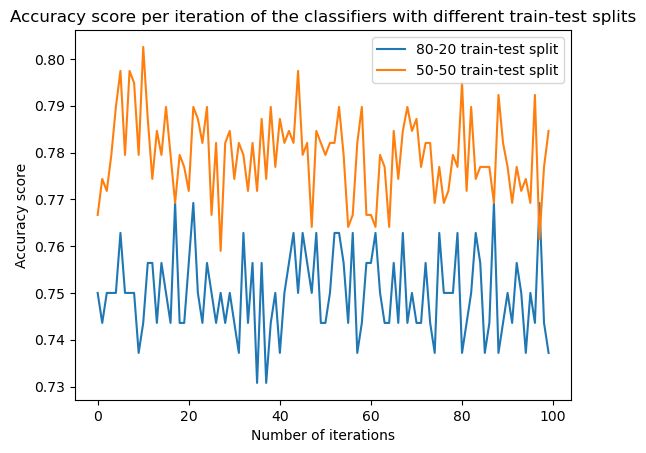

In [21]:
plt.plot(range(100), a_list, label='80-20 train-test split')
plt.plot(range(100), a2_list, label='50-50 train-test split')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy score')
plt.title('Accuracy score per iteration of the classifiers with different train-test splits')
plt.legend()